<a href="https://colab.research.google.com/github/AlumiK/tensorflow2-notebooks/blob/main/06%20Recommender%20Systems/15_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommender System

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [ ]:
!wget -nc 'http://files.grouplens.org/datasets/movielens/ml-20m.zip'
!unzip -n 'ml-20m.zip'

--2020-10-09 07:38:48--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  25.2MB/s    in 8.2s    

2020-10-09 07:38:56 (23.1 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [ ]:
df = pd.read_csv('ml-20m/ratings.csv')
df['newUserId'] = pd.Categorical(df['userId']).codes
df['newMovieId'] = pd.Categorical(df['movieId']).codes
U = df['newUserId'].values
M = df['newMovieId'].values
y = df['rating'].values

U_train, U_test, M_train, M_test, y_train, y_test = train_test_split(U, M, y, test_size=0.2)

N1 = len(U)
N2 = len(M)
D = 10

Epoch 1/25
15626/15626 [==============================] - 32s 2ms/step - loss: 0.7948 - val_loss: 0.7314
Epoch 2/25
15626/15626 [==============================] - 32s 2ms/step - loss: 0.7058 - val_loss: 0.7018
Epoch 3/25
15626/15626 [==============================] - 31s 2ms/step - loss: 0.6833 - val_loss: 0.6863
Epoch 4/25
15626/15626 [==============================] - 32s 2ms/step - loss: 0.6675 - val_loss: 0.6798
Epoch 5/25
15626/15626 [==============================] - 30s 2ms/step - loss: 0.6569 - val_loss: 0.6735
Epoch 6/25
15626/15626 [==============================] - 30s 2ms/step - loss: 0.6488 - val_loss: 0.6737
Epoch 7/25
15626/15626 [==============================] - 32s 2ms/step - loss: 0.6389 - val_loss: 0.6606
Epoch 8/25
15626/15626 [==============================] - 31s 2ms/step - loss: 0.6255 - val_loss: 0.6554
Epoch 9/25
15626/15626 [==============================] - 31s 2ms/step - loss: 0.6119 - val_loss: 0.6466
Epoch 10/25
15626/15626 [==============================

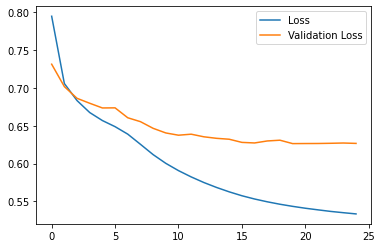

In [ ]:
u = tf.keras.layers.Input(shape=(1,))
m = tf.keras.layers.Input(shape=(1,))
u_emb = tf.keras.layers.Embedding(N1, D)(u)
m_emb = tf.keras.layers.Embedding(N2, D)(m)
u_emb = tf.keras.layers.Flatten()(u_emb)
m_emb = tf.keras.layers.Flatten()(m_emb)
x = tf.keras.layers.Concatenate()([u_emb, m_emb])
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(inputs=[u, m], outputs=x)

model.compile(optimizer=tf.keras.optimizers.SGD(0.08, 0.9), loss='mse')

r = model.fit([U_train, M_train],
              y_train,
              validation_data=([U_test, M_test], y_test),
              epochs=25,
              batch_size=1024)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()